# Filter shapefile for one province

## Preliminaries

Import Dependencies

In [28]:
import geopandas as gpd
import pandas as pd
import pyproj
import os


Set Province

In [4]:
province = "Quezon"

Load File

<Axes: >

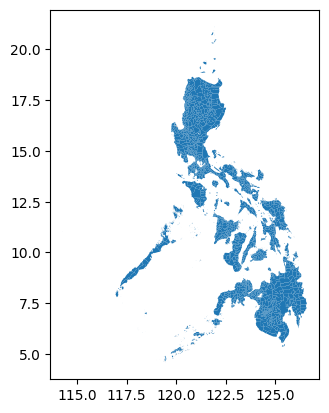

In [7]:
sf = gpd.read_file("../01_data/00_raw/01_shapefiles/PH_Adm3_MuniCities.shp/PH_Adm3_MuniCities.shp.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [9]:
sf.head()

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,102801000,Adams,Mun,45997,111184551,45,111.0,"POLYGON ((120.96915 18.51012, 120.95867 18.463..."
1,100000000,102800000,102802000,Bacarra,Mun,33313,55346073,33,55.0,"POLYGON ((120.66821 18.28705, 120.66441 18.282..."
2,100000000,102800000,102803000,Badoc,Mun,64985,80758428,64,80.0,"POLYGON ((120.47814 17.97717, 120.47816 17.977..."
3,100000000,102800000,102804000,Bangui,Mun,52068,115127442,52,115.0,"POLYGON ((120.81318 18.53457, 120.81358 18.533..."
4,100000000,102800000,102805000,City of Batac,City,66661,158252391,66,158.0,"POLYGON ((120.61242 18.10947, 120.612 18.10679..."


## Filter Province

Get PSGC Codes for Selected Province

In [ ]:
# load csv file
df_psgc_prov = pd.read_csv('../01_data/00_raw/02_psgc_codes/PH_Adm2_ProvDists.csv')

# get code for province
prov_psgc = df_psgc_prov.loc[df_psgc_prov['adm2_en'] == province].iloc[0]['adm2_psgc']

# delete dataframe
del df_psgc_prov

prov_psgc

405600000

Get PSGC Codes for Municipalities in Province

In [20]:
# load csv file
df_psgc_mun = pd.read_csv('../01_data/00_raw/02_psgc_codes/PH_Adm3_MuniCities.csv')

# filter dataframe
df_psgc_mun = df_psgc_mun[df_psgc_mun['adm2_psgc'] == prov_psgc]

# set to length of 10 digits
#mun_pgsc = mun_pgsc.apply(lambda x: str(x).zfill(10))

#df_psgc_mun['psgc_clean'] = df_psgc_mun['adm3_psgc'].apply(lambda x: str(x).zfill(10))
mun_pgsc = df_psgc_mun['adm3_psgc']

df_psgc_mun.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2
435,400000000,405600000,405601000,Agdangan,Mun,34244,35570335,34,35.0
436,400000000,405600000,405602000,Alabat,Mun,55435,60379983,55,60.0
437,400000000,405600000,405603000,Atimonan,Mun,106626,221201475,106,221.0
438,400000000,405600000,405605000,Buenavista,Mun,80702,171222657,80,171.0
439,400000000,405600000,405606000,Burdeos,Mun,235220,234301453,235,234.0
440,400000000,405600000,405607000,Calauag,Mun,234811,312322396,234,312.0
441,400000000,405600000,405608000,Candelaria,Mun,73581,136742366,73,136.0
442,400000000,405600000,405610000,Catanauan,Mun,100560,253178824,100,253.0
443,400000000,405600000,405615000,Dolores,Mun,39004,65964175,39,65.0
444,400000000,405600000,405616000,General Luna,Mun,66219,100002066,66,100.0


Get all Rows that match the PSGC Code

In [21]:
mun_pgsc

435    405601000
436    405602000
437    405603000
438    405605000
439    405606000
440    405607000
441    405608000
442    405610000
443    405615000
444    405616000
445    405617000
446    405618000
447    405619000
448    405620000
449    405621000
450    405622000
451    405623000
452    405625000
453    405627000
454    405628000
455    405629000
456    405630000
457    405631000
458    405632000
459    405633000
460    405634000
461    405635000
462    405636000
463    405637000
464    405638000
465    405639000
466    405640000
467    405641000
468    405642000
469    405644000
470    405645000
471    405646000
472    405647000
473    405648000
474    405649000
Name: adm3_psgc, dtype: int64

In [23]:
sf_filtered = sf[sf['adm3_psgc'].isin(mun_pgsc)]

sf_filtered.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
435,400000000,405600000,405601000,Agdangan,Mun,34244,35570335,34,35.0,"POLYGON ((121.94201 13.91753, 121.94497 13.913..."
436,400000000,405600000,405602000,Alabat,Mun,55435,60379983,55,60.0,"POLYGON ((122.06424 14.12704, 122.06416 14.126..."
437,400000000,405600000,405603000,Atimonan,Mun,106626,221201475,106,221.0,"POLYGON ((121.98928 13.97747, 121.98927 13.977..."
438,400000000,405600000,405605000,Buenavista,Mun,80702,171222657,80,171.0,"POLYGON ((122.50998 13.76809, 122.51003 13.768..."
439,400000000,405600000,405606000,Burdeos,Mun,235220,234301453,235,234.0,"MULTIPOLYGON (((122.02335 14.78502, 122.02295 ..."
440,400000000,405600000,405607000,Calauag,Mun,234811,312322396,234,312.0,"MULTIPOLYGON (((122.30787 14.10203, 122.30804 ..."
441,400000000,405600000,405608000,Candelaria,Mun,73581,136742366,73,136.0,"POLYGON ((121.47859 14.06479, 121.47831 14.063..."
442,400000000,405600000,405610000,Catanauan,Mun,100560,253178824,100,253.0,"POLYGON ((122.36459 13.71811, 122.37694 13.704..."
443,400000000,405600000,405615000,Dolores,Mun,39004,65964175,39,65.0,"POLYGON ((121.40066 13.9732, 121.39582 13.9735..."
444,400000000,405600000,405616000,General Luna,Mun,66219,100002066,66,100.0,"POLYGON ((122.27495 13.74842, 122.28006 13.744..."


<Axes: >

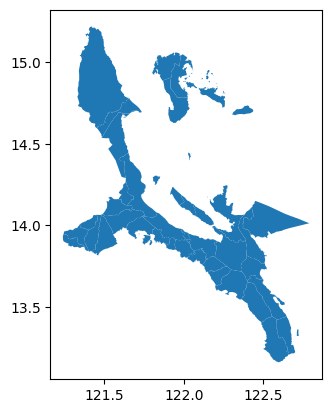

In [24]:
sf_filtered.plot()

Export to File

In [ ]:
os.mkdir(f"../01_data/01_processed/02_filtered_shapefiles/{province}")

sf_filtered.to_file(f"../01_data/01_processed/02_filtered_shapefiles/{province}/{province}.shp")